<a href="https://colab.research.google.com/github/JavierMarin24/ADA-Informes/blob/main/Informe2-MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Problema de Ordenamiento**

Un sistema, sin importar su tamaño, funcionará mejor cuando todo está en perfecto orden. Es por esto que se requiere que los datos se encuentren en un orden óptimo para ser utilizados por lo que en este informe se expondrá una de las soluciones ya existentes para el ordenamiento de datos, el cual recibe el nombre de **"Merge Sort"**.

A continuación, se definen los datos de entrada y salida del algoritmo que solucionará el problema.

**Entrada**: Arreglo o Lista de N datos comparables.

*Si se ingresa un arreglo o lista de datos heterogeneos, el algoritmo  no será  capaz de ordenarlos.*

**Salida**: Arreglo o Lista con los N datos ordenados de forma ascendente.

El tamaño del problema lo indica la cantidad de datos de entrada, el cual corresponde a **N**.


#**2. Descripción del Merge Sort**

El algortimo recibe como parametro un arreglo o lista con **n** elementos comparables los cuales se ordenarán dentro de la misma estructura.


1. La función **Merge Sort** recibe como parametro al arreglo, el cual si tiene más de un elemento, **se divide en 2 sub-arreglos**, uno izquierdo y uno derecha.
2. Una vez dividido en 2 partes, se vuelve a llamar a la función Merge Sort **(recursividad)**, entregándole como parametro el sub-arreglo generado anteriormente. Merge Sort se seguirá llamando hasta que todos los elementos del arreglo original estén separados en sub-arreglos de un solo elemento.
3. Ya teniendo cada elemento en su propio sub-arreglo, se llama a la función Merge, la cual se encargará de ir juntando los elementos, creando sub-arreglos de mayor tamaño pero con los elementos ya ordenados.
4. Cuando se obtienen 2 sub-arreglos(uno izquierdo y uno derecho) ordenados, se procede a juntarlos en un arreglo del mismo largo que el oringinal, comparando los elementos menores de cada sub-arreglo y  traspasando el menor de ellos en el arreglo principal y borrando dicho elemento del sub-arreglo correspondiente. Cuando uno de los sub-arreglos queda vacío, se copian los elementos restantes del otro sub-arreglos en el mismo orden hacia el arreglo principal.



### 2.1**Ejemplo**

**Paso 1**: En las casillas en rojo, está actuando Merge sort, dividiendo el arreglo original en 2 subarreglos en cada una de las iteraciones.

**Paso 2**: Cuando los elementos se encuentran en sub-arreglos independientes (casillas de color gris) comienza a ejecutarse la función Merge, la cual irá juntando los elementos en sub-arreglos más grandes pero ordenandolos de menor a mayor (casillas en verde).

**Paso 3**: Se obtienen 2 sub-arreglos ordenados donde se compara el menor elemento de ambos y el que resulte ser menor, se copia a un arreglo del mismo largo que el original y se elimina el elemento del sub-arreglo

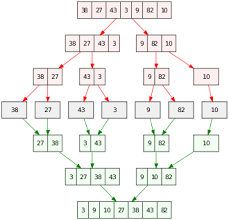

In [37]:
# Función merge_sort
contComparaciones=0
def merge_sort(lista, verbose=False):
   if(verbose == True):
    print("Arreglo a dividir: ", lista,"\n")
   medio = len(lista) // 2 #calculo de la mitad del largo del arreglo

   #división del arreglo en mitad derecha y mitad izquierda

   left = lista[:medio] 
   right = lista[medio:]
  
   if len(lista) < 2: #se retorna el arreglo si esta tiene solo un elemento
      if(verbose == True):
           print(lista, "\n")
      return lista
   
   else:

        if(verbose == True):
          
          print(left,right,"\n")

        #Se llama recursivamente a Merge Sort 
        left = merge_sort(left) 
        right = merge_sort(right)
        return merge(left, right)
    

def merge(arrayIzq, arrayDer,verbose = False):
    
    i, j = 0, 0 # Indices para moverse por los arreglos de izquierda y derecha
    arrayOrdenado = [] 

    if(verbose == True):
      print("Se aplica merge los siguientes arreglos: ", arrayIzq, " y ", arrayDer,"\n")
    
    #En el siguiente ciclo, se comienza a ordenar de menor a mayor los elementos de los sub-arreglos en un único arreglo
    while(i < len(arrayIzq) and j < len(arrayDer)):
        if(verbose == True):
          print("Se compara: ", arrayIzq[i]," y ", arrayDer[j], " , el menor se agregará al arrayOrdenado")
        if (arrayIzq[i] < arrayDer[j]):
            arrayOrdenado.append(arrayIzq[i])
            i += 1
        else:
            arrayOrdenado.append(arrayDer[j])
            j += 1
        if(verbose == True):
          print(arrayOrdenado)
        global contComparaciones
        contComparaciones += 1
          
    
    #Se agregan al arreglo los elementos restantes del sub-arreglo que no haya traspasado todos sus elementos
    if(i<j):
      while(i<len(arrayIzq)):
        arrayOrdenado.append(arrayIzq[i])
        i += 1
        contComparaciones += 1

      if(verbose == True):
        print("Los elementos restantes, ", arrayIzq[i:],", se agregan al arreglo ordenado\n")
      #arrayOrdenado += arrayIzq[i:]
    else:
      while(j<len(arrayDer)):
        arrayOrdenado.append(arrayDer[j])
        j += 1
        contComparaciones += 1
      if(verbose == True):
        print("Los elementos restantes, ", arrayDer[j:],", se agregan al arreglo ordenado\n")
      #arrayOrdenado += arrayDer[j:]

    if(verbose == True):
      print("El arreglo ordenado queda de la forma: ", arrayOrdenado, "\n")
  
    return arrayOrdenado

# Prueba del algoritmo

lista = [1,2,3,4,5,6]

merge_sort_result = merge_sort(lista)  
print(merge_sort_result)
print("comparaciones = ", contComparaciones)


[1, 2, 3, 4, 5, 6]
comparaciones =  16


# **3. Propiedades del Algoritmo** 






### **3.1 Tiempo de Ejecución**





**3.1.1 Teorema**

El algoritmo **Merge Sor**t tiene un tiempo de ejecución de **O(nlogn)** tanto en el mejor como en el peor caso teórico.

**3.1.2 Prueba del Teorema**

Para comprobar que O(nlogn) corresponde al tiempo de ejecución del algoritmo, se utilizará un **árbol de recurrencia** el cual se basa en lo siguiente: 

***T(n)*** -> **n** si n es pequeño.

***T(n)*** -> **2** *  **T(n/2)** + **c*n** si n es grande

Para comprender mejor la fórmula, se explicará cada una de las variables de esta: 



*   La constante **2** se debe a que Merge Sort divide las lista o arreglos en 2 sub-arreglos.
*   **T(n/2)** se debe a que cada vez que se divide un arreglo de tamaño **n**, se generan arreglos cuyo tamaño es **1/2** del arreglo original.
*   C*N se debe a que el ordenamiento de Merge tiene complejidad lineal.

A continuación se adjunta una imagen correspondiente al árbol de recurrencia del Merge Sort.



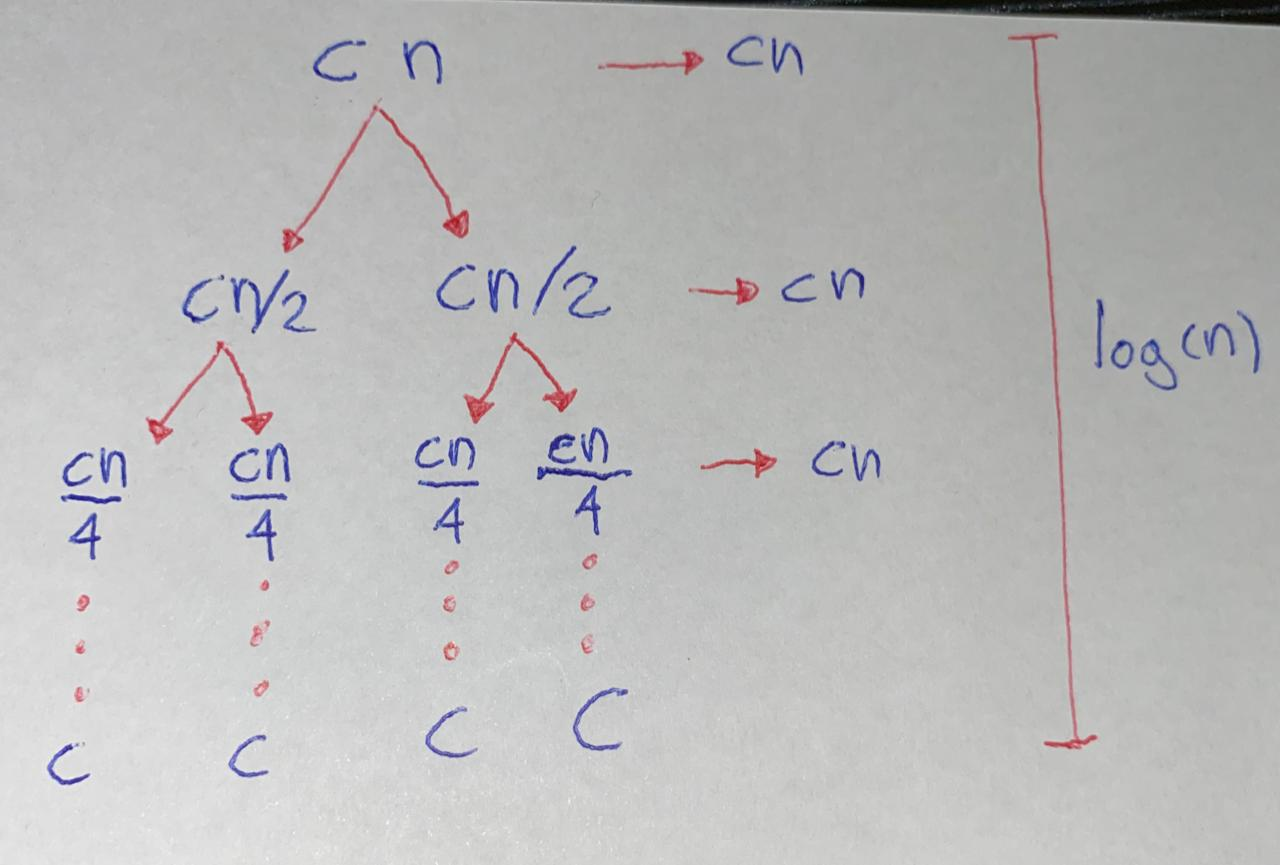



Concluyendo, en cada altura del árbol, la suma de los tiempos corresponde a **c*n**  mientras que la altura del árbol corresponde a $\log_2 n$..

Sumando **cn** con  $\log_2 n$.  se concluye que el tiempo de ejecución del algoritmo corresponde a \rightarrow O(n \log n)

# 4. Correctitud




### **4.1 Correctitud Merge**

***Propiedad invariante de bucle para Merge***

En cada iteración **i**, el elemento que se agrega al **arrayOrdenado** es siempre **mayor** que el que se encuentra en la posición **i-1** del **arrayOrdenado**

Para comprobar esta propiedad, se debe cumplir en la **Inicialización** y la **Mantención** del algoritmo.

**Inicialización :** Antes de la primera iteracion **i = 0**, el **arrayOrdenado** se encuentra **vacío** por lo que cumple la propiedad.

**Mantención:** En cada iteración **i**, se le añade un elemento de uno de los dos sub-arreglos que se quieren fusionar, el cual  será **mayor** que el elemento en la posición **i-1** del **arrayOrdenado**, manteniendo así la propiedad invariante de bucle.

### **4.2 Correctitud MergeSort**

Para probar la correctitud del algortimo MergeSort usaremos **inducción matemática**.

**Hipótesis**: Merge Sort retorna un arreglo con los mismos **n** elementos del arreglo de entrada pero **ordenados de menor a mayor**.

Por inducción se debe cumplir lo siguiente: 
1. Probar $P(n)$ para un **caso base**, por ejemplo $P(1)$
2. Probar que si $P(m)$ es cierto para $m<n$, entonces $P(n)$ también lo es.

**Caso base**: cuando se ingresa un arreglo de largo n=1, MergeSort retorna el mismo arreglo ingresado.

**Paso inductivo**: cuando un arreglo es de **n** elementos, este se divide en dos sub-arreglos de largo **n/2** y los ordena. Ya que los sub-arreglos poseen un largo menor que el de **n**, con el paso inductivo se asume que se ordenan de manera correcta. Finalmente se fusionan los dos últimos sub-arreglos mediante la funcón **Merge**, retornando así el arreglo ingresado originalmente de n elementos, esta vez ordenado de menor a mayor. 

# 5. Experimentos

### 5.1 Número de comparaciones del mejor y peor caso.

In [43]:
#Ejemplo
mejorCaso = [1,2,3,4,5,6]
contComparaciones = 0
arrayMejorCaso = merge_sort(mejorCaso)  
comparacionesMejorCaso = contComparaciones
print("Comparaciones mejor caso : ",comparacionesMejorCaso)
peorCaso = [6,5,4,3,2,1]
contComparaciones = 0
arrayPeorCaso = merge_sort(peorCaso)
comparacionesPeorCaso = contComparaciones
print("Comparaciones peor caso : ", comparacionesPeorCaso)


Comparaciones mejor caso :  16
Comparaciones peor caso :  16


Con un solo ejemplo se puede ver que tanto el mejor caso como el peor caso generan el **mismo número de comparaciones**, para corroborar este dato, se presenta la siguiente gráfica :

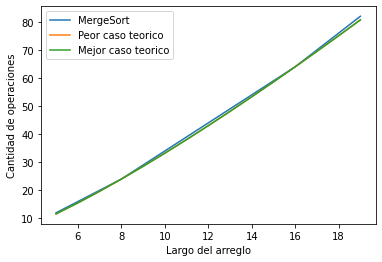

In [42]:
import matplotlib.pyplot as plt 
from math import log2
import random


x=[n for n in range(5,20)] 
y1=[n*log2(n) for n in range(5,20)] 
y2=[n*log2(n) for n in range(5,20)]
y=[]; 

for n in range(5,20):
  contComparaciones = 0
  arr = random.sample(range(1, 100), n)
  merge_sort(arr, verbose = False)
  y.append(contComparaciones)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "Peor caso teorico", "Mejor caso teorico"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Cantidad de operaciones')
plt.show()

**5.1.1 Análisis de Resultados **

Tal como se vió en el ejemplo anterior, la gráfica muestra que **no existe un mejor o peor   caso** para el algoritmo de Merge Sort(las curvas se son casi coincidentes), ya que **independiente del orden** de los datos, el algoritmo hará el mismo número de comparaciones.

### 5.2 Merge Sort v/s Insertion Sort

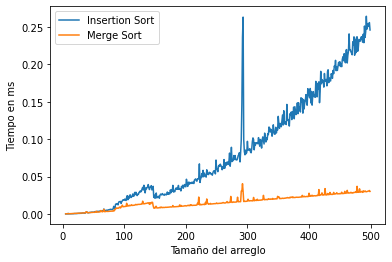

In [49]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def insertionSort(arreglo, verbose=False): #Para ver lo que sucede en cada iteración, verbose debe ser igual a True
  largoArreglo = len(arreglo)
  cantidadIntercambiosFinal = 0
  cantidadComparaciones = 0

  for i in range(1,largoArreglo):
    
    comparador = arreglo[i] #Variable que guarda el valor que estamos reubicando en el arreglo
    posicionComparador=i
    contadorIntercambios = 0

    if(verbose == True):
        print("Comparamos el elemento de la posición ", i, " del arreglo con los elementos a su izquierda", arreglo ) 
        
    for j in range(1,i+1):
      cantidadComparaciones = cantidadComparaciones + 1
      if( comparador < arreglo[i-j]): #Si la variable que se quiere ordenar, es menor a la que se encuentra a su izquierda, se intercambian
          contadorIntercambios = contadorIntercambios+1
          if(verbose == True):
            print("Se intercambia el valor", comparador, " con el ",arreglo[i-j] )        
          arreglo[posicionComparador] = arreglo[i-j] #intercambio de variables
          posicionComparador = posicionComparador-1
          arreglo[posicionComparador] = comparador #intercambio de variables
          if(verbose == True) :
            print(arreglo)
      else :
        break
    cantidadIntercambiosFinal = cantidadIntercambiosFinal + contadorIntercambios
    if(contadorIntercambios == 0 and verbose == True):
      print("No se generaron intercambios: ", arreglo)
  if(verbose == True):
    print("Se realizaron un total de ", cantidadComparaciones," comparaciones")
    print("Se realizaron un total de ", cantidadIntercambiosFinal," intercambios")

  return arreglo, cantidadComparaciones


x=[]; y=[]
y1=[]

for n in range(5,500):
  contComparaciones = 0
  a = random.sample(range(1, 1000), n)

  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import merge_sort", stmt=f"merge_sort({a},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Insertion Sort", "Merge Sort"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

**5.2.1 Análisis de Resultados **

Como se muestra en la gráfica, en arreglos de tamaños **menores que 100** no hay una diferencia significativa en el tiempo de ejecución de ambos algoritmos. 

En cambio mientras más va aumentando el tamaño de los arreglos se puede ver una clara diferencia entre ambos algoritmos, siendo **Merge Sort mucho más eficiente que Insertion Sort** ya que este último si se ve afectado por el orden en que se enceuntran los datos del arreglo de entrada mientras que Merge Sort como se demostró en este informe, tiene un tiempo de ejecución bastante constante ya que no hay diferencias entre su mejor y peor caso.